# nlp project youssef shahen 20107033 Ahmed hesham

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


In [2]:
file_path = r'D:\books for study\nlp\final project\Restaurant_Reviews.tsv'
data = pd.read_csv(file_path, delimiter='\t', quoting=3)

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.describe

<bound method NDFrame.describe of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [5]:
print("Missing values in the training set:")
print(data.isnull().sum())

Missing values in the training set:
Review    0
Liked     0
dtype: int64


In [6]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

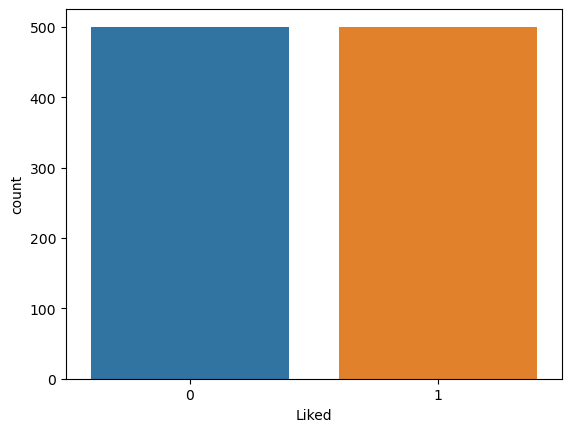

In [7]:
sns.countplot(x=data['Liked'])

In [8]:
data['Review Letter Count']=data['Review'].apply(len)
data

,Review,Liked,Review Letter Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [9]:
data.iloc[data['Review Letter Count'].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [10]:
data['Review'] =data['Review'].apply(lambda x: x.lower())
data.head()

,Review,Liked,Review Letter Count
0,wow... loved this place.,1,24
1,crust is not good.,0,18
2,not tasty and the texture was just nasty.,0,41
3,stopped by during the late may bank holiday of...,1,87
4,the selection on the menu was great and so wer...,1,59


In [11]:
corpus=data['Review']

In [12]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['Review'] = data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Liked,Review Letter Count
0,wow... loved place.,1,24
1,crust good.,0,18
2,tasty texture nasty.,0,41
3,stopped late may bank holiday rick steve recom...,1,87
4,selection menu great prices.,1,59


In [13]:
data['Review'] = data['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
data.head()

,Review,Liked,Review Letter Count
0,wow loved place,1,24
1,crust good,0,18
2,tasty texture nasty,0,41
3,stopped late may bank holiday rick steve recom...,1,87
4,selection menu great prices,1,59


In [14]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
data['Review'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
data.head()


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Review,Liked,Review Letter Count
0,wow loved place,1,24
1,crust good,0,18
2,tasty texture nasty,0,41
3,stopped late may bank holiday rick steve recom...,1,87
4,selection menu great price,1,59


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv =CountVectorizer()

In [17]:
cv.fit_transform(corpus).toarray().shape

(1000, 2035)

In [18]:
x=cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
y=data['Liked']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# using machine learning algorthim

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
clf=MultinomialNB()

In [22]:
clf.fit(x_train,y_train)

MultinomialNB()

In [23]:
y_pred=clf.predict(x_test)

In [24]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [26]:
print(confusion_matrix(y_test,y_pred))

[[81 15]
 [26 78]]


In [27]:
print(accuracy_score(y_test,y_pred))

0.795


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        96
           1       0.84      0.75      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



In [29]:
text = 'I Like This Restaurant'
text = text.lower()
text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
text = text.translate(str.maketrans('', '', string.punctuation))
text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
text_vectorized = cv.transform([text]).toarray()
prediction_nb = clf.predict(text_vectorized)
print(f"Predicted sentiment using Naive Bayes: {prediction_nb}")

if prediction_nb==1:
    print(f"Predicted sentiment using Naive Bayes: positive")
elif prediction_nb==0:
    print(f"Predicted sentiment using Naive Bayes: negative")


Predicted sentiment using Naive Bayes: [1]
Predicted sentiment using Naive Bayes: positive


In [30]:
text = 'I hate This Restaurant'
text = text.lower()
text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
text = text.translate(str.maketrans('', '', string.punctuation))
text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
text_vectorized = cv.transform([text]).toarray()
prediction_nb = clf.predict(text_vectorized)
print(f"Predicted sentiment using Naive Bayes: {prediction_nb}")

if prediction_nb==1:
    print(f"Predicted sentiment using Naive Bayes: positive")
elif prediction_nb==0:
    print(f"Predicted sentiment using Naive Bayes: negative")

Predicted sentiment using Naive Bayes: [0]
Predicted sentiment using Naive Bayes: negative


# using deep learning algorthim

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
input_feature_dim = x_train.shape[1]
num_classes = 2
epochs = 10
batch_size = 32

In [33]:
y_train_one_hot = tf.one_hot(y_train, depth=num_classes)
y_test_one_hot = tf.one_hot(y_test, depth=num_classes)

In [34]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=input_feature_dim))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test_one_hot))

loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f'Accuracy: {accuracy}')



Epoch 1/10


25/25 [==============================] - 3s 28ms/step - loss: 0.6803 - accuracy: 0.5850 - val_loss: 0.6660 - val_accuracy: 0.6550
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.5773 - accuracy: 0.8350 - val_loss: 0.6045 - val_accuracy: 0.7250
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 0.3999 - accuracy: 0.9225 - val_loss: 0.5089 - val_accuracy: 0.7350
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 0.2093 - accuracy: 0.9638 - val_loss: 0.4566 - val_accuracy: 0.7950
Epoch 5/10
25/25 [==============================] - 0s 10ms/step - loss: 0.0932 - accuracy: 0.9937 - val_loss: 0.4640 - val_accuracy: 0.8000
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 0.0434 - accuracy: 0.9975 - val_loss: 0.4899 - val_accuracy: 0.8050
Epoch 7/10
25/25 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.9987 - val_loss: 0.5248 - val_accuracy: 0.8050
Epoch 8/10
2

In [35]:
y_pred_prob = model.predict(x_test)
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 4ms/step
[[82 14]
 [25 79]]
0.805
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        96
           1       0.85      0.76      0.80       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [36]:
text = 'I Like This Restaurant'
text = text.lower()
text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
text = text.translate(str.maketrans('', '', string.punctuation))
text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
text_vectorized = cv.transform([text]).toarray()
text_pred_prob = model.predict(text_vectorized)
text_pred = tf.argmax(text_pred_prob, axis=1).numpy()
print(f"Predicted sentiment using Deep Learning: {text_pred}")

if prediction_nb==1:
    print(f"Predicted sentiment using Naive Bayes: positive")
elif prediction_nb==0:
    print(f"Predicted sentiment using Naive Bayes: negative")


1/1 [==============================] - 0s 53ms/step
Predicted sentiment using Deep Learning: [1]
Predicted sentiment using Naive Bayes: negative


In [37]:
text = 'I hate this restaurant'
text = text.lower()
text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
text = text.translate(str.maketrans('', '', string.punctuation))
text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
text_vectorized = cv.transform([text]).toarray()
text_pred_prob = model.predict(text_vectorized)
text_pred = tf.argmax(text_pred_prob, axis=1).numpy()
print(f"Predicted sentiment using Deep Learning: {text_pred}")

if prediction_nb==1:
    print(f"Predicted sentiment using Naive Bayes: positive")
elif prediction_nb==0:
    print(f"Predicted sentiment using Naive Bayes: negative")


1/1 [==============================] - 0s 51ms/step
Predicted sentiment using Deep Learning: [1]
Predicted sentiment using Naive Bayes: negative
